# The Sparks Foundation :GRIP June 2021
# Data Science and Business Analytics Internship
# Author:Nakshatra Garad

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
%matplotlib inline


# Import and print dataset

In [7]:
s_data = pd.read_csv("scores.csv")
print(s_data)


    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [10]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
s_data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# Description about dataset

In [12]:
s_data.shape

(25, 2)

In [13]:
s_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [15]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
s_data.min()

Hours      1.1
Scores    17.0
dtype: float64

In [17]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
s_data.iloc[1:7]

,Hours,Scores
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


# Visualization using Scatter plot

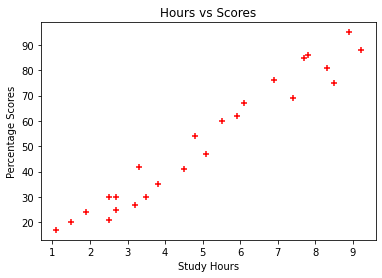

In [11]:
x=s_data['Hours']
y=s_data['Scores']
mp.title('Hours vs Scores')
mp.xlabel('Study Hours')
mp.ylabel('Percentage Scores')
mp.scatter(x,y,color='red',marker='+')
mp.show()

# Spliting of dataset into testing and training

In [29]:
x=s_data.iloc[:,:-1].values
y=s_data.iloc[:,-1].values

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain.shape

(17, 1)

# creating simple linear model

In [33]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(xtrain,ytrain)
print ("Training completed")

Training completed


# for intercept

In [20]:
model.intercept_

2.5069547569547623

# for slope checking

In [28]:
model.coef_

array([9.78856669])

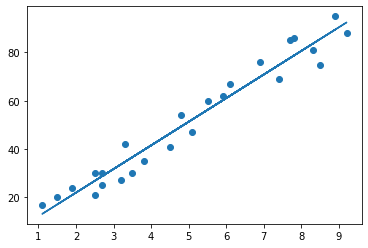

In [31]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
mp.scatter(x, y)
mp.plot(x, line);
mp.show()

# Prediction

In [34]:
y_pred=model.predict(xtest)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

# Actual and predicted values

In [38]:
df=pd.DataFrame({'Actual':ytest,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# Creating a combined plot

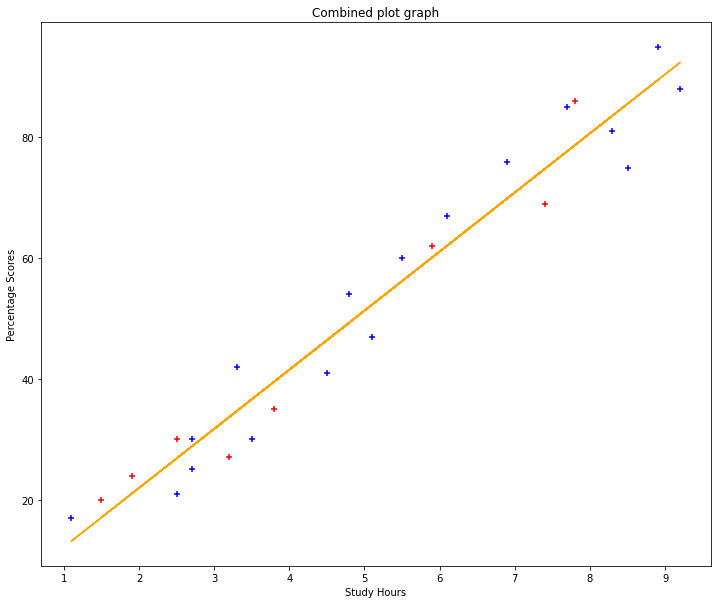

In [42]:
mp.figure(figsize=(12,10))
mp.title('Combined plot graph')
mp.xlabel('Study Hours')
mp.ylabel('Percentage Scores')
mp.scatter(xtest,ytest,color='red',marker='+')
mp.scatter(xtrain,ytrain,color='blue',marker='+')
mp.plot(x,model.predict(x),color=('orange'),label='Regression Line')
mp.show()

# Model Evaluation

# Mean Absolute Error

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,ytest)

4.419727808027652

# Mean Squared Error

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,ytest)

22.96509721270043

In [53]:
print("Enter the no.of hours:")
hours = float(input())
model.predict([[hours]])


Enter the no.of hours:
9.25


array([92.91505723])

# What will be predicted score if a student studies for 9.25 hrs/ day?
# =>92.91505723